## June 29 2016 
Notes on the contribution of 3-body physics on momentum distribution.  Here I try to make some estimates on the relative contribution of the three body term as compared to the two body term.  Note that the analysis here is a bit questionable, since I'm using theoretical results I don't understand so well.  

The tails of the momentum-space distribution, $n(k)$, in the presence of two and three body contact interactions is given in Smith et al. Phys. Rev. Lett. 112, 110402 (2014) to be

$$lim_{k\rightarrow\infty}  k^4 n(k)\sim C_2 + \alpha(k)C_3$$

where $n(k)$ has been normalized such that

$$ \int d\mathbf{k} \frac{n(k)}{(2\pi)^3} = N$$

For the three body term, 
$$\alpha(k)=\frac{A\sin\left[2s_0\ln(k/\kappa_{\star}+\phi)\right]}{k}$$

Where $A=89.2626$, $s_0=1.00624$, $\phi=-1.33813$ are constants.  $\kappa_{\star}$ is related to the physics of the Efimov trimer for the particular atom being studied.  

"The value of $\kappa_{\star}$" can be inferred from the scattering length $a_-$ at which the Efimov trimer crosses the 3-atom threshold... They are related by a universal constant: $a_-\kappa_{\star}=-1.50763$".

For Helium-4, I infer $\kappa_{\star}$ from this work: Kunitski et al, Science 348, 551-555 (2015).  Figure 1 shows a calculation of the binding energies of the trimer states as a function of scattering length $a$.  I consider the 1st excited state branch (most likely to populate this state?).  The exact values of the transition from a three body state to three free particles are not given, but by scale it looks like it falls around $a\simeq -4$ nm $

So this give us $\kappa_{\star}\sim3.8e9$ [1/m]

The contacts, $C_2$ and $C_3$, for a trapped gas are determined from the contact densities $\mathcal{C}_2$ and $\mathcal{C}_3$, using the local density approximation and integrating over the cloud distribution.  For a dilute BEC ($T=0$), the contact densities are

$$\mathcal{C}_2=16\pi^2a^2n^2$$

$$\mathcal{C}_3= f a^4n^3$$

with 
$$f=\frac{16\pi^2(4\pi-3\sqrt{3})s_0\cosh(\pi s_0)}{3\sinh^3(\pi s_0)}\approx 2.82$$

where $n$ is the local density. Accounting for the normalization factor, the contacts are

$$ C_2 = \frac{1}{(2\pi)^3}\int \mathcal{C}_2 d\vec{r} $$

$$ C_3 = \frac{1}{(2\pi)^3}\int \mathcal{C}_3 d\vec{r} $$

For a Thomas-Fermi distribution, I find

$$ C_2 = \frac{8}{7\pi}a^2 N n_0 $$

$$ C_3 = \frac{5f}{77\pi^3}a^4 N n_0^2 $$

where $n_0$ is the density at the center of the cloud, and $N$ is the number of atoms.

I will then evaluate the ratio of the 3-body and 2-body contributions to the momentum distribution,

$$R\equiv \frac{\alpha(k)C_3}{C_2}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
%matplotlib inline

In [3]:
# constants
hbar=1.054e-34
m=4e-3/6.02e23
a=7.5e-9
g=4*np.pi*hbar**2*a/m;

In [4]:
# universal constants
s0=1.00624
A=89.2626
phi=-1.33813

In [5]:
# experiment parameter
n0=1e19
k=np.arange(1e3,10e6,1e3)

In [9]:
# define function to calculate R for different values of a_-
def calcR(am):
    # Efimov    
    Kstar=-1.50763/am
    # 3-body parameters
    alpha=A*np.sin(2*s0*np.log(k/Kstar)+phi)/k
    f=16*pi**2*(4*pi-3*np.sqrt(3.))*s0*np.cosh(pi*s0)/(3*np.sinh(pi*s0)**3)
    # contact per atom, C/N
    C2=8/7/pi*a**2*n0
    C3=5*f/77/pi**3*a**4*n0**2
    # Ratio of contributions
    R=1+alpha*C3/C2    
    return R

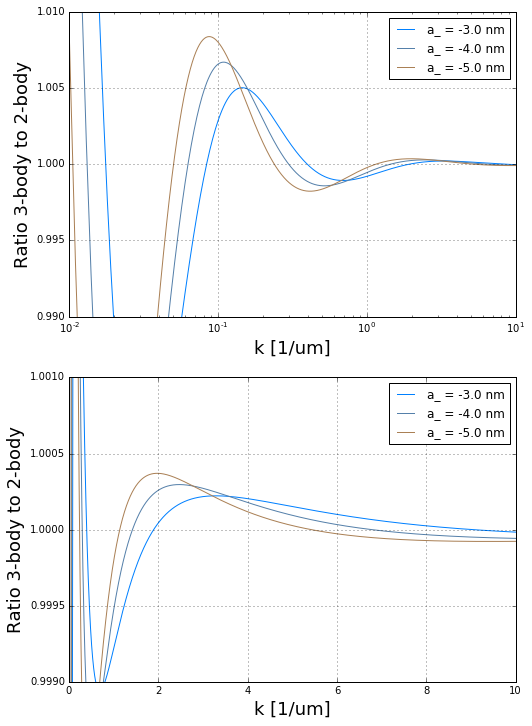

In [17]:
# Calculate and plot R for different values of a_-
amList=[-3e-9,-4e-9,-5e-9]
NList=len(amList)
fig=plt.figure(figsize=(8,12))
ii=-1
for am in amList:
    ii+=1
    col=[(ii)/NList, 0.5, 1-(ii)/NList]
    R=calcR(am)  
    plt.subplot(211)
    plt.semilogx(k*1e-6,R,color=col,label='a_ = {} nm'.format(am*1e9))    
    plt.xlim([1e-2,10])
    plt.ylim([-1e-2+1,1e-2+1])
    plt.grid()    
    plt.subplot(212)
    plt.plot(k*1e-6,R,color=col,label='a_ = {} nm'.format(am*1e9))    
    plt.xlim([1e-2,10])
    plt.ylim([-1e-3+1,1e-3+1])
    plt.grid()    
plt.subplot(211)
plt.legend()
plt.ylabel('Ratio 3-body to 2-body', fontsize=18)
plt.xlabel('k [1/um]', fontsize=18)
plt.subplot(212)
plt.legend()
plt.ylabel('Ratio 3-body to 2-body', fontsize=18)
plt.xlabel('k [1/um]', fontsize=18)

Above I've plotted $R$ for several different values of $a_-$ according to  Kunitski et al (1st excited state).  We observe the expected log periodic oscillations due to the three-body term.  Two things to note: 1) In the region we are interested in (k~1 to 10 1/um), the oscillations the three-body term is relatively flat.  2) The amplitude of the three-body effect is tiny, on the order of $10^{-3}$ or smaller.